In [490]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [491]:
df=pd.read_csv('tips.csv')

In [492]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Data Analysis

In [493]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [495]:
df.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [496]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [497]:
df.isna()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [498]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [499]:
df['tip'].unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75])

In [500]:
new_df.corr()

,total_bill,tip,size,sex_new,smoker_new,day_new,time_new
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,-0.043550,-0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,-0.011548,-0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.069510,-0.103411
sex_new,0.144877,0.088862,0.086195,1.000000,0.002816,-0.078292,-0.205231
smoker_new,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.282721,-0.054921
day_new,-0.043550,-0.011548,0.069510,-0.078292,-0.282721,1.000000,0.638019
time_new,-0.183118,-0.121629,-0.103411,-0.205231,-0.054921,0.638019,1.000000


# Converting object data into int 

In [501]:
le=LabelEncoder()

In [502]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [503]:
df['sex_new']=le.fit_transform(df['sex'])

In [504]:
df['sex_new']

0      0
1      1
2      1
3      1
4      0
      ..
239    1
240    0
241    1
242    1
243    0
Name: sex_new, Length: 244, dtype: int32

In [505]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [506]:
df['smoker_new']=le.fit_transform(df['smoker'])

In [507]:
df['smoker_new']

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker_new, Length: 244, dtype: int32

In [508]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [509]:
df['day_new']=le.fit_transform(df['day'])

In [510]:
df[['day_new']]

,day_new
0,2
1,2
2,2
3,2
4,2
...,...
239,1
240,1
241,1
242,1


In [511]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [512]:
df['time_new']=le.fit_transform(df['time'])

In [513]:
df['time_new']

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time_new, Length: 244, dtype: int32

In [514]:
df

,total_bill,tip,sex,smoker,day,time,size,sex_new,smoker_new,day_new,time_new
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,1,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,1,0


In [515]:
new_df=df.drop(['sex','smoker','day','time'],axis=1)

In [516]:
new_df

,total_bill,tip,size,sex_new,smoker_new,day_new,time_new
0,16.99,1.01,2,0,0,2,0
1,10.34,1.66,3,1,0,2,0
2,21.01,3.50,3,1,0,2,0
3,23.68,3.31,2,1,0,2,0
4,24.59,3.61,4,0,0,2,0
...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0
240,27.18,2.00,2,0,1,1,0
241,22.67,2.00,2,1,1,1,0
242,17.82,1.75,2,1,0,1,0


# Data Visualization

In [517]:
cols = new_df.columns.tolist()
cols

['total_bill', 'tip', 'size', 'sex_new', 'smoker_new', 'day_new', 'time_new']

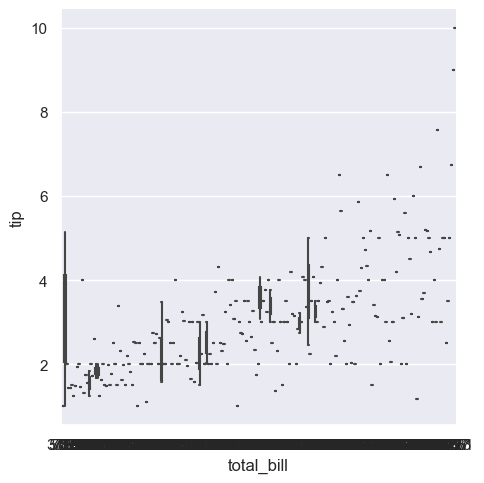

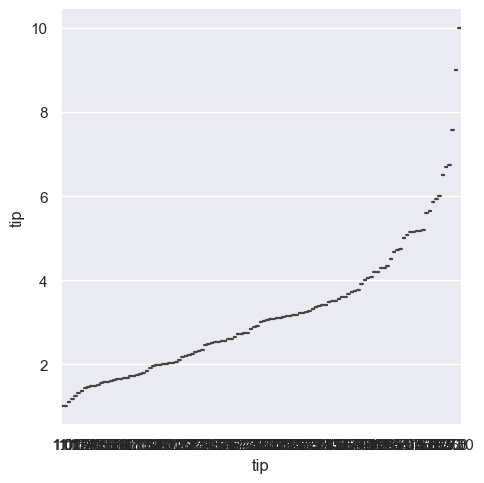

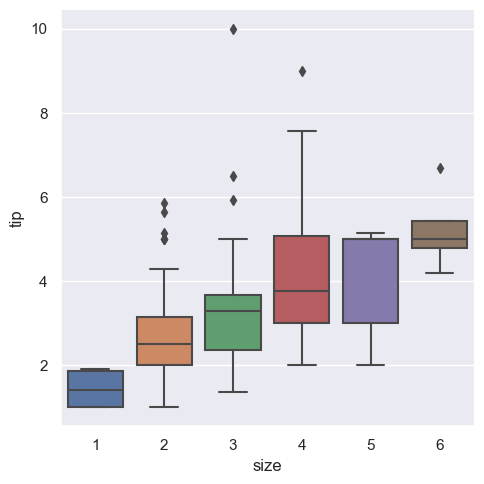

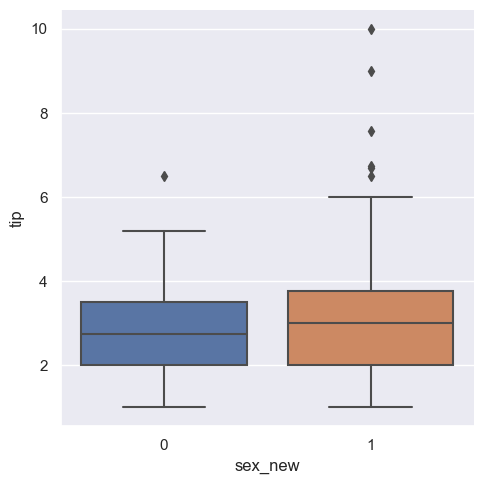

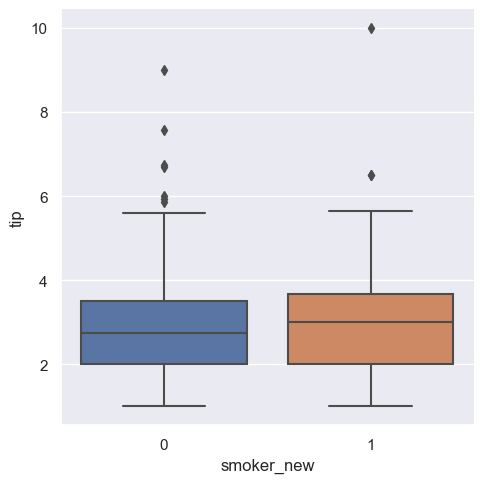

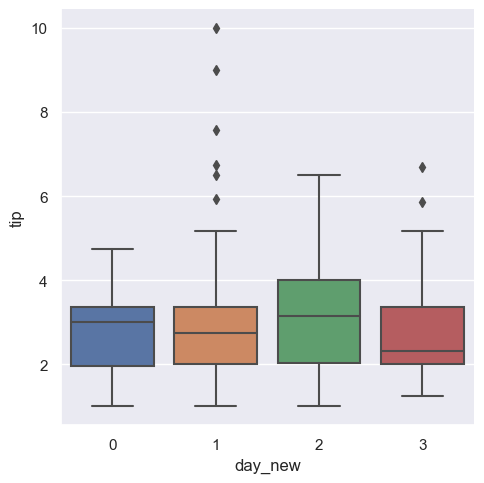

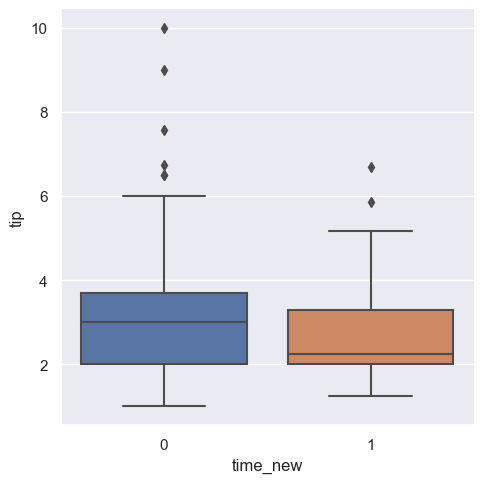

In [518]:
for value in cols:
    sns.catplot(data=new_df, x=value, y="tip", kind="box")


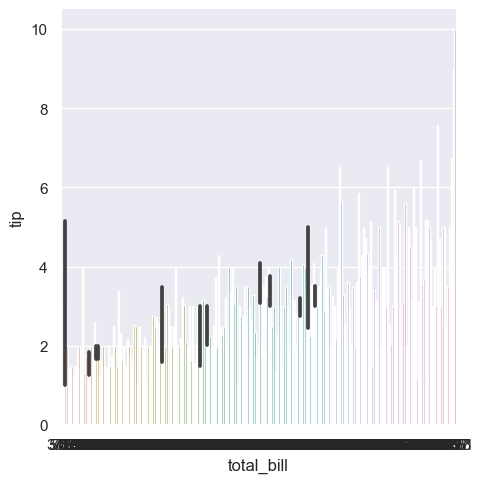

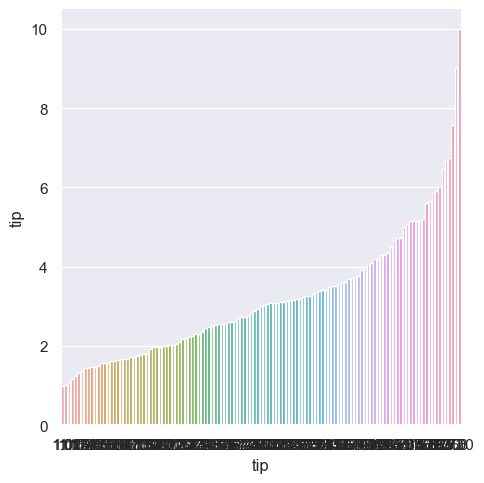

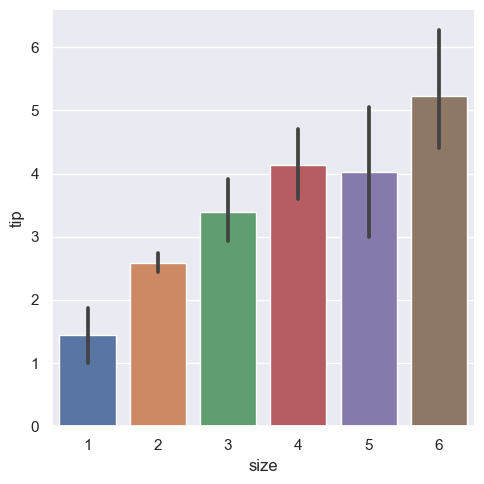

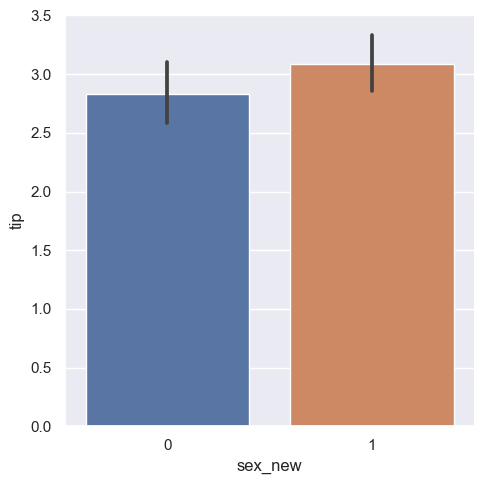

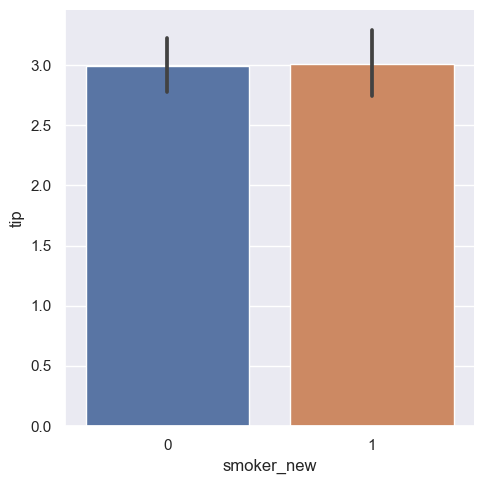

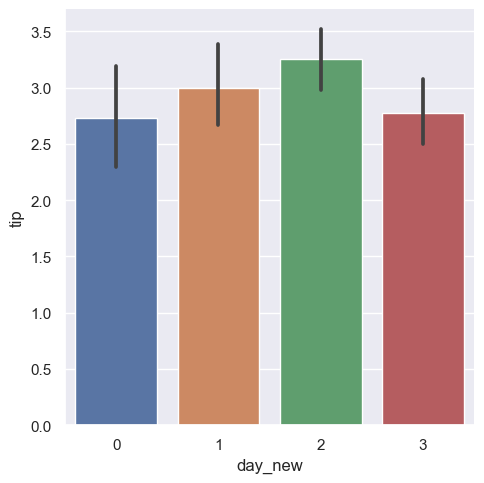

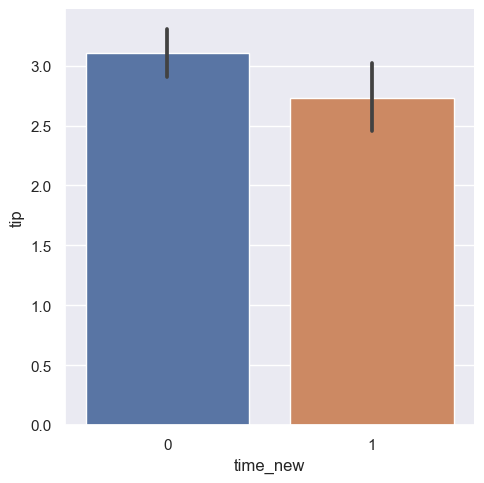

In [519]:
for value in cols:
    sns.catplot(data=new_df, x=value, y="tip", kind="bar")


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

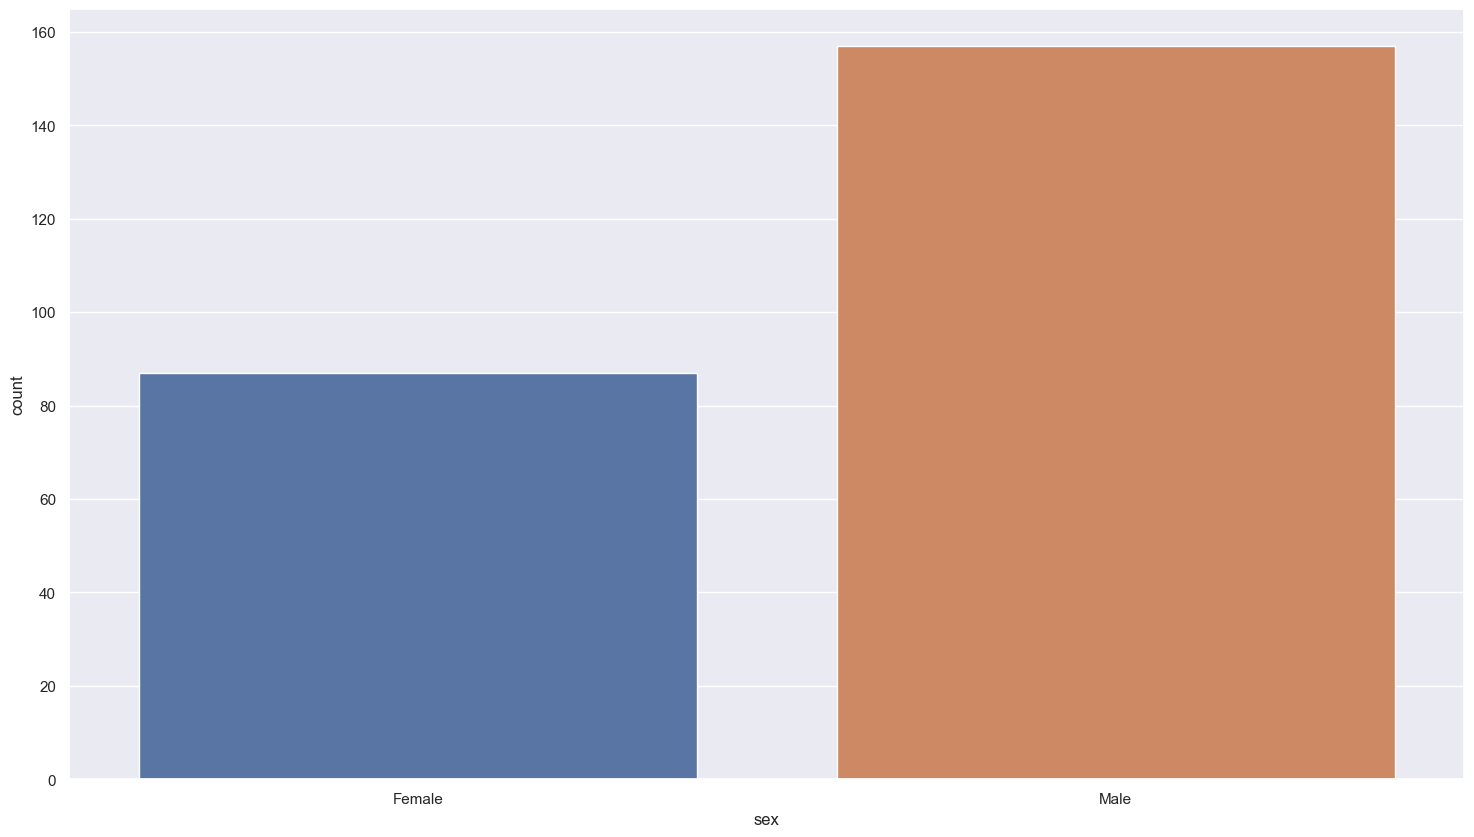

In [520]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.countplot(df['sex'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='count'>

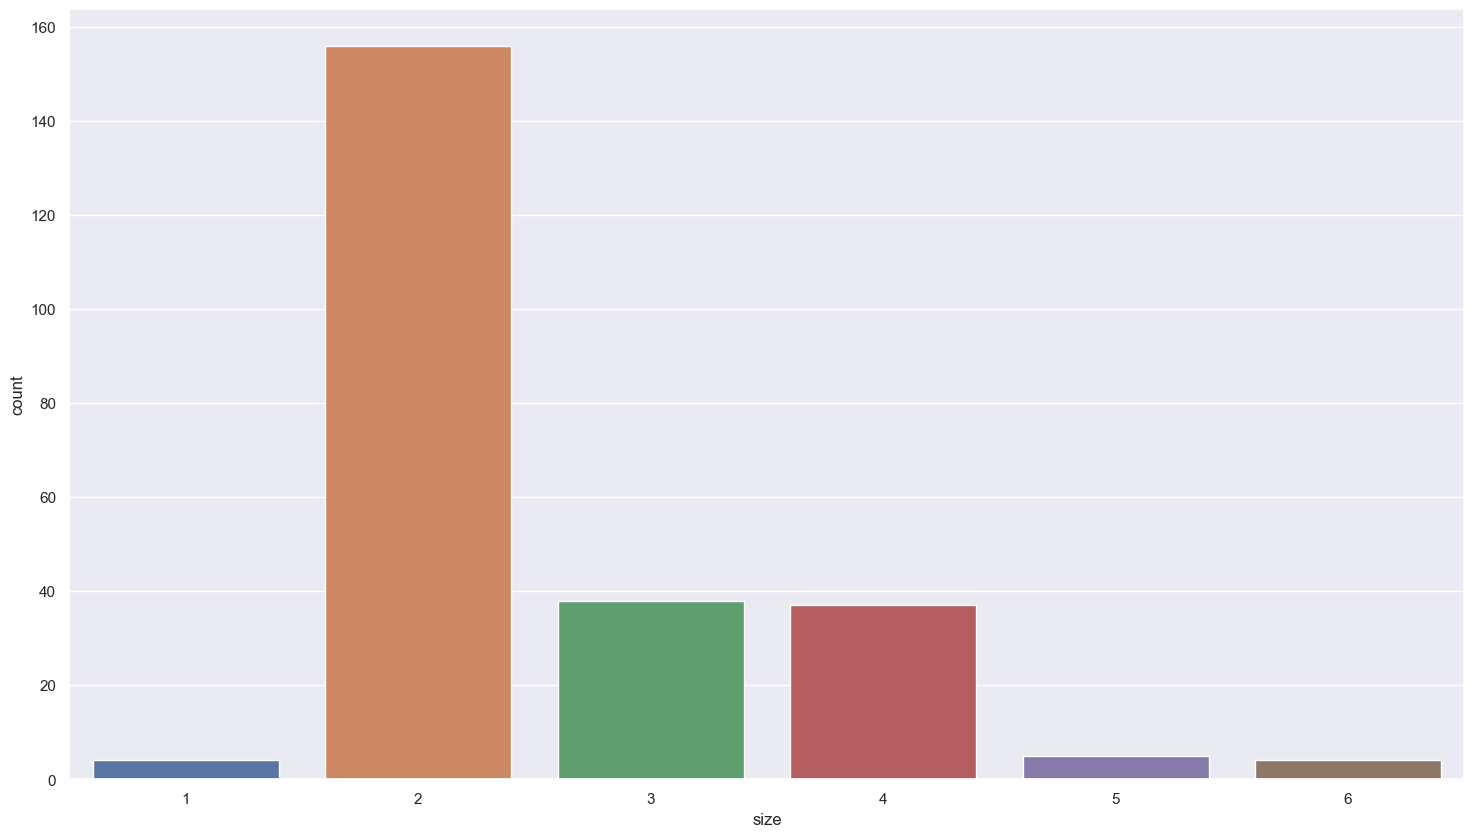

In [521]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.countplot(df['size'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

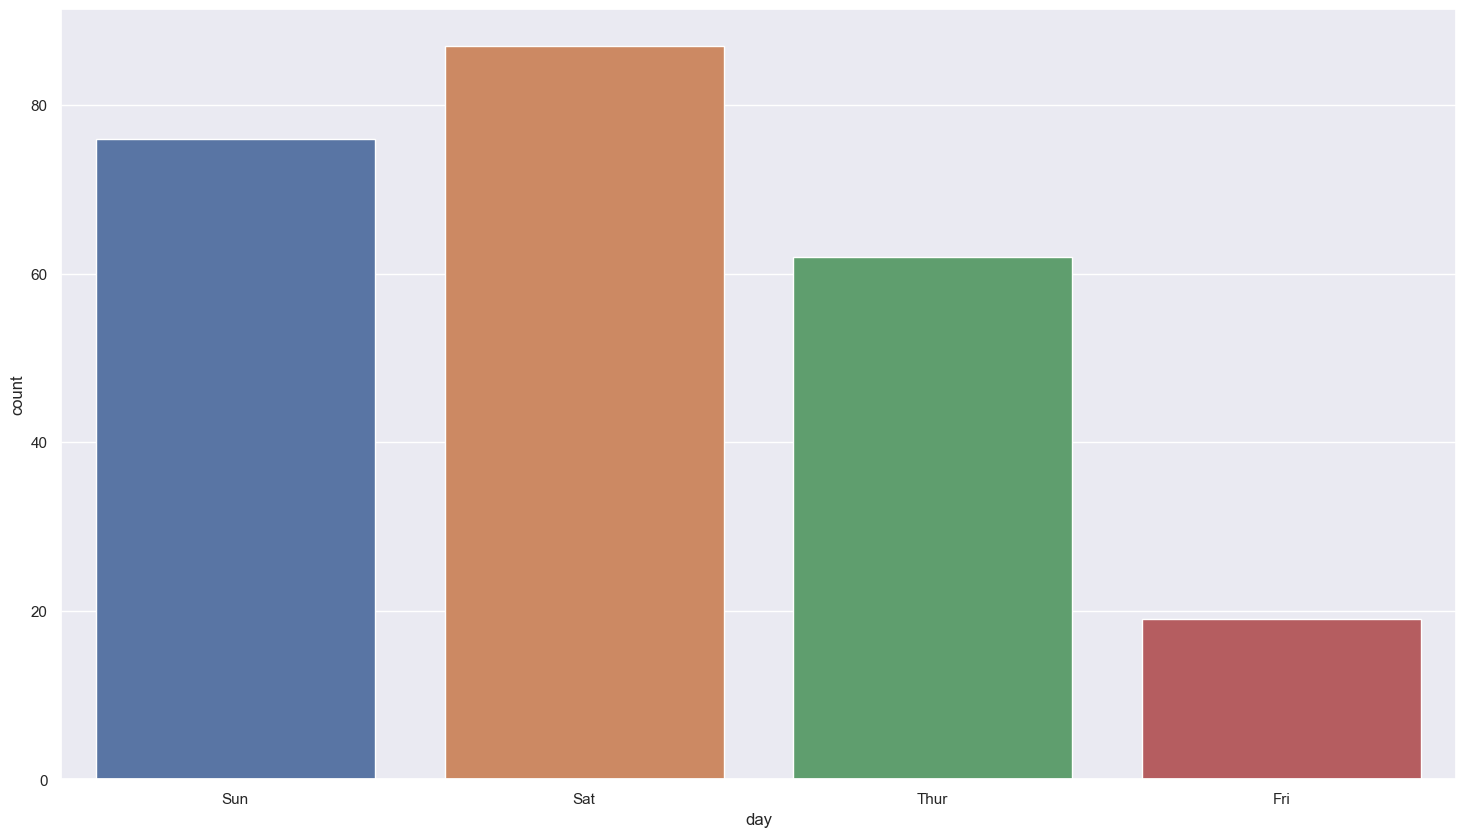

In [522]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.countplot(df['day'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

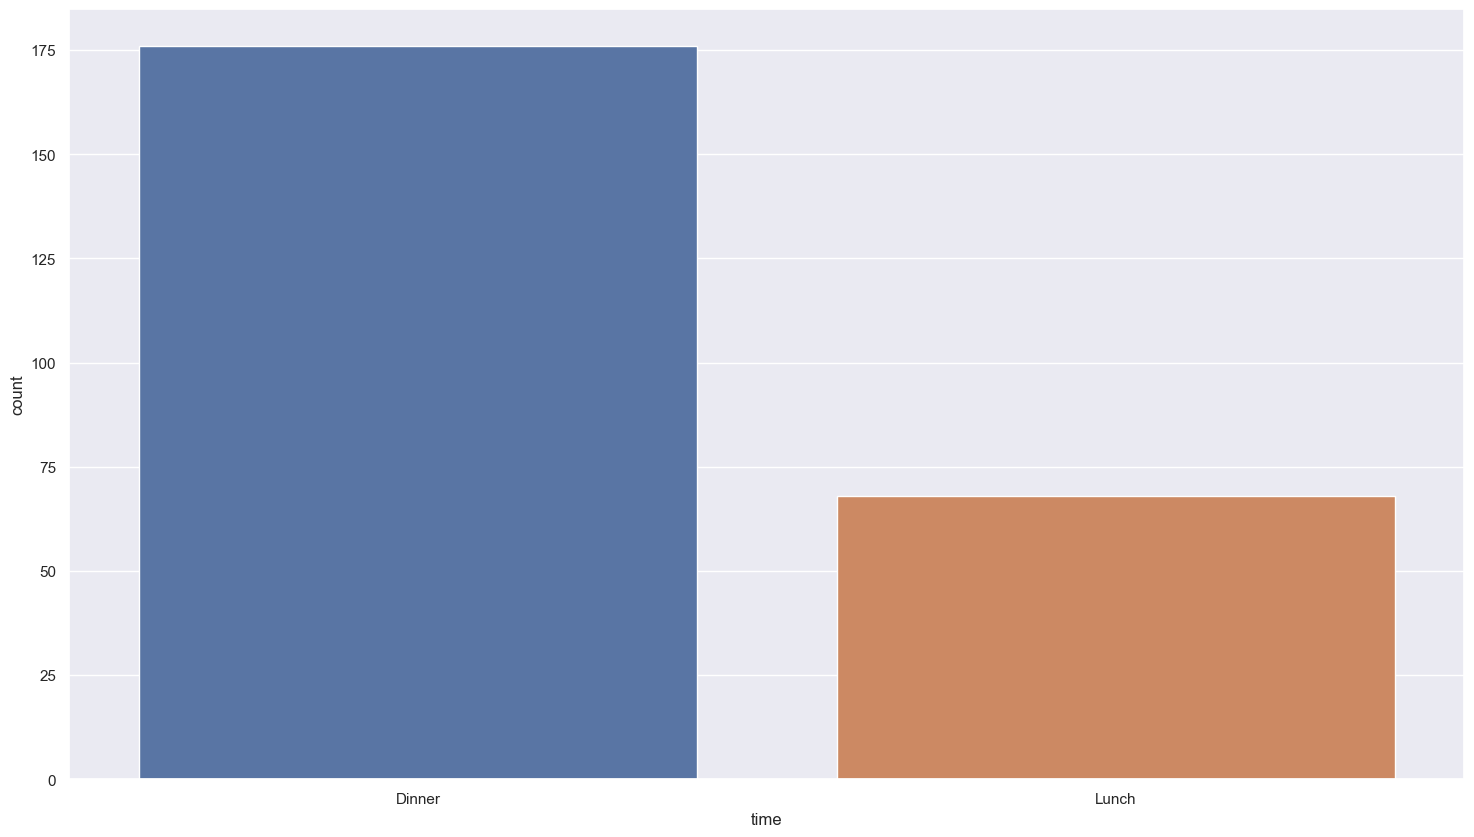

In [523]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.countplot(df['time'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

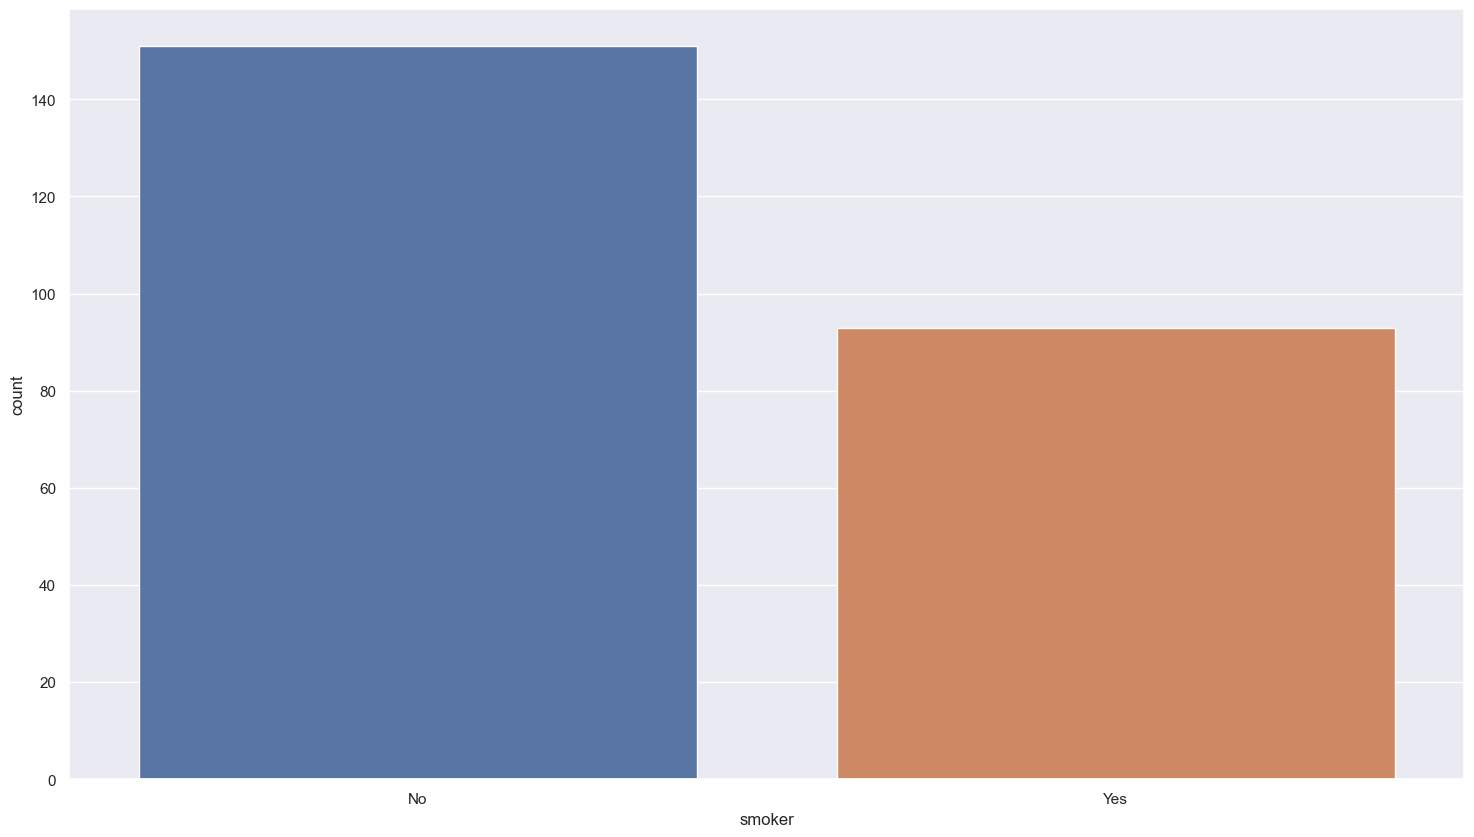

In [524]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.countplot(df['smoker'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

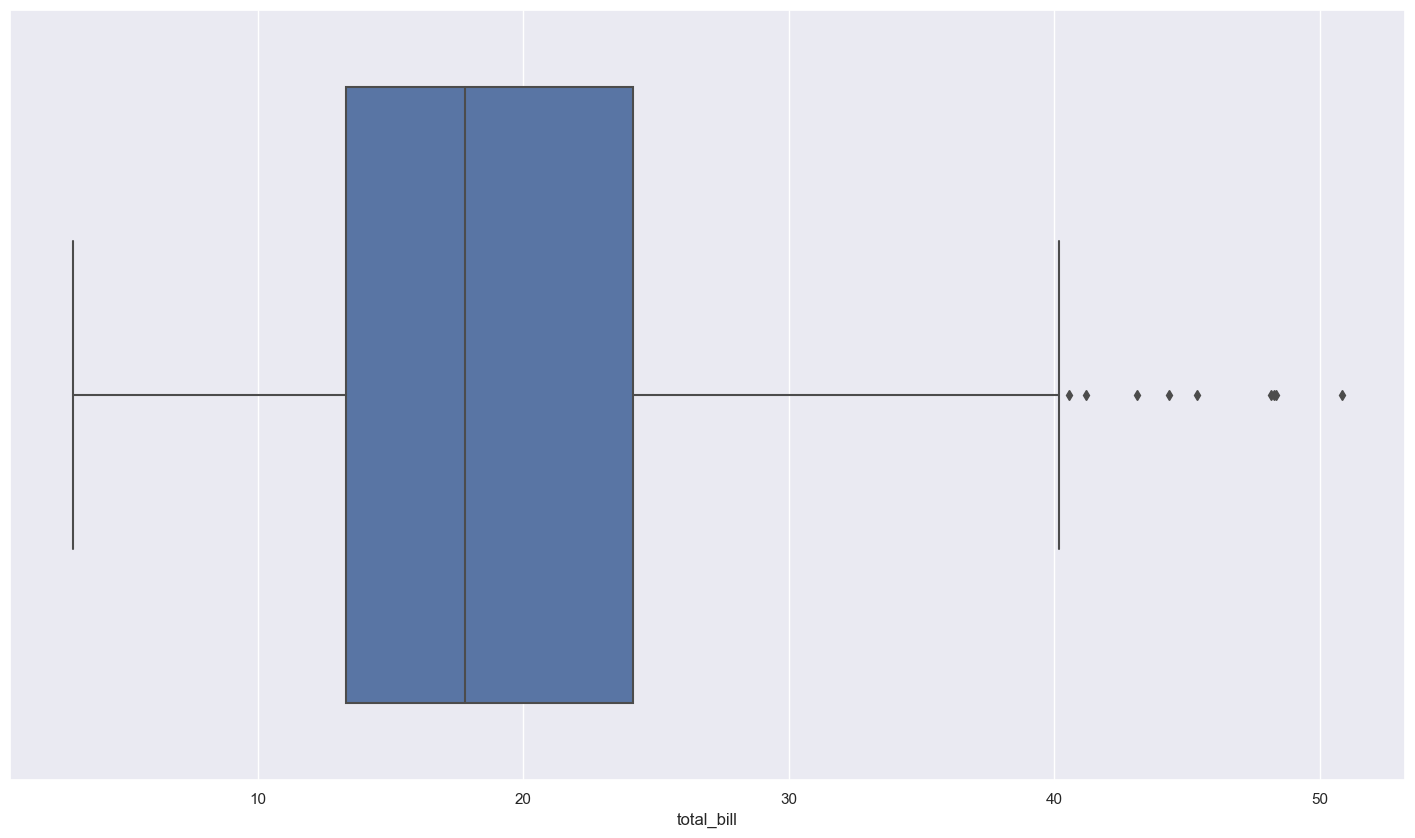

In [525]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.boxplot(df['total_bill'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

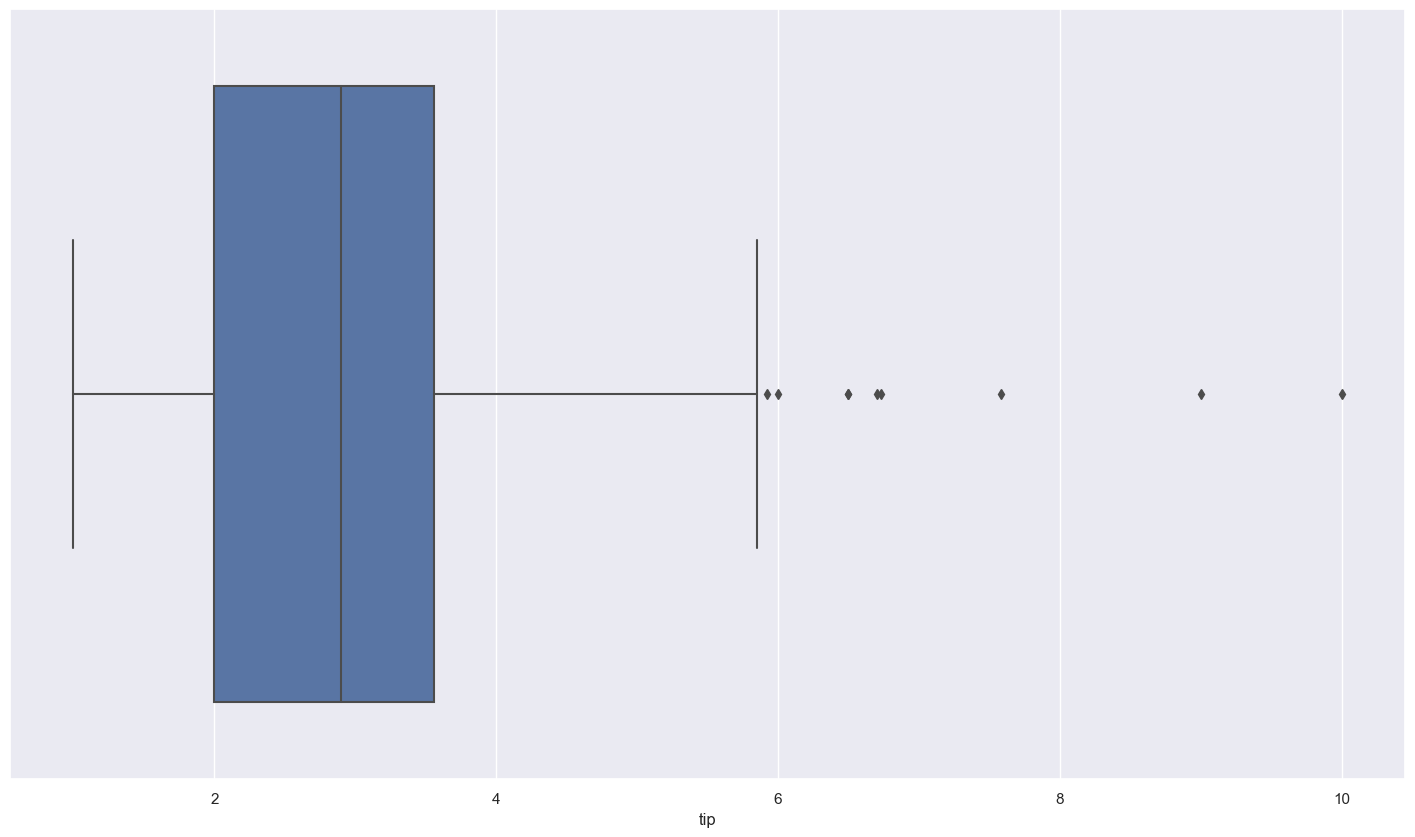

In [526]:
sns.set(rc = {'figure.figsize':(18,10)})
sns.boxplot(df['tip'])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

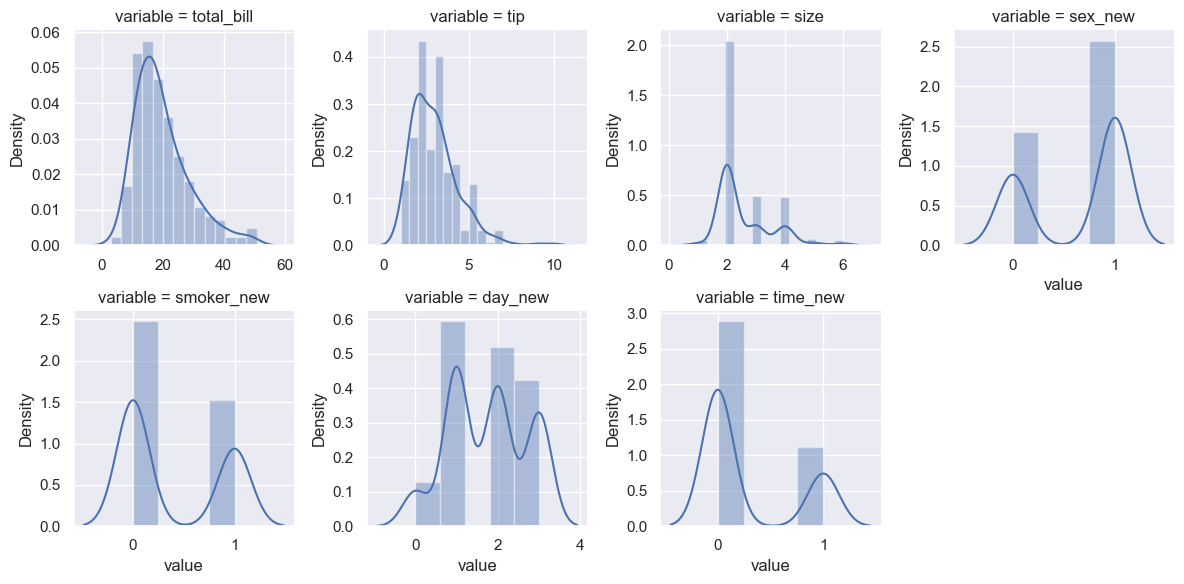

In [527]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

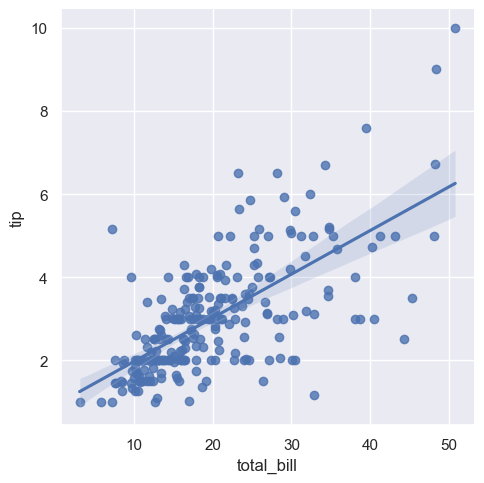

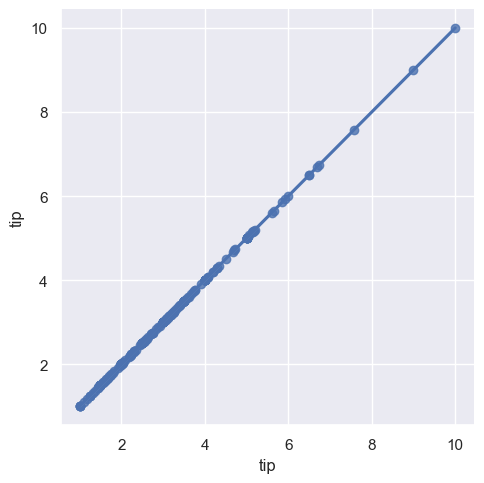

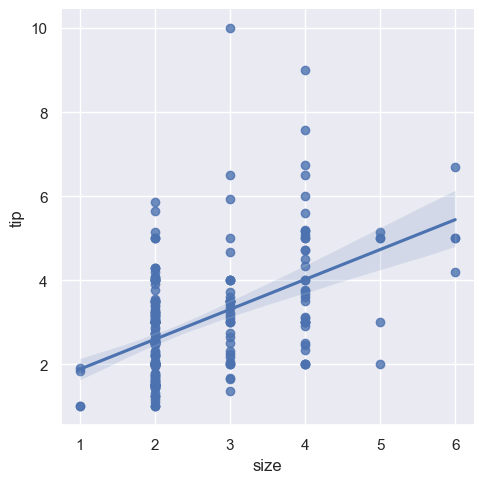

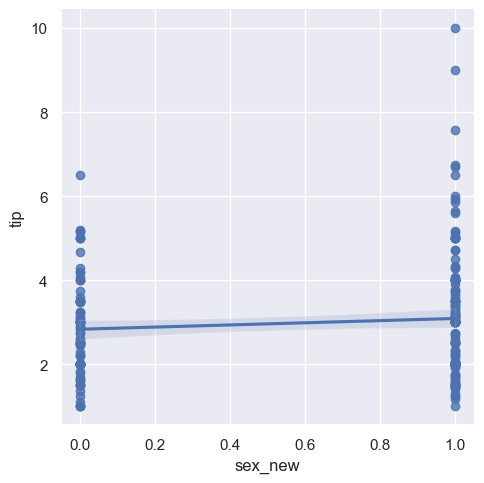

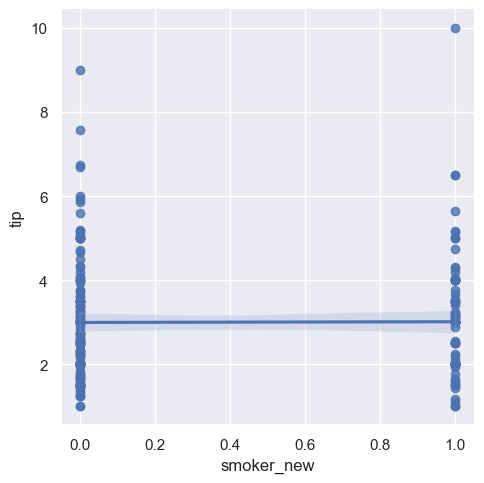

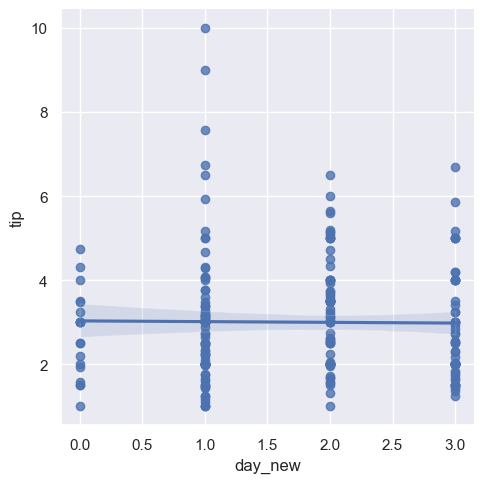

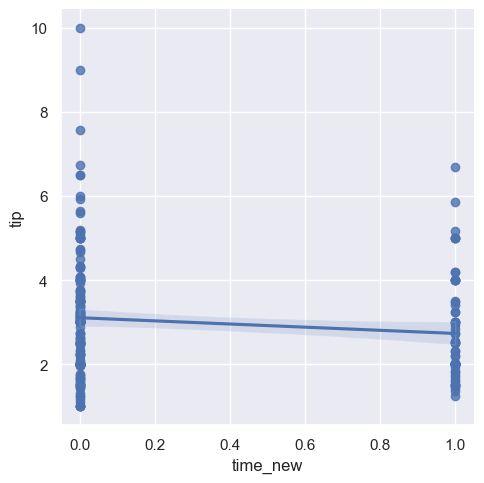

In [528]:
#sir please explain the information the line give in this graph 
for value in cols:
    sns.lmplot(x=value, y="tip", data=df);

# Checking skewness

In [529]:
new_df.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
sex_new      -0.602658
smoker_new    0.492471
day_new      -0.057940
time_new      0.993335
dtype: float64

In [530]:
def right_nor_left(df, col):
    
    rs = df[value].skew()
    print(rs)

    if rs > 0:
        return "positive (+ve) skewed"
    
    elif rs == 0:
        return "normal skewed"
    
    elif rs < 0:
        return "negative (-ve) skewed"
        
    

In [531]:
c=new_df.columns.tolist()
c

['total_bill', 'tip', 'size', 'sex_new', 'smoker_new', 'day_new', 'time_new']

In [532]:
for value in c:
    
    print(value, "->",right_nor_left(new_df,value))

1.1332130376158205
total_bill -> positive (+ve) skewed
1.4654510370979401
tip -> positive (+ve) skewed
1.4478815386834785
size -> positive (+ve) skewed
-0.6026584794390981
sex_new -> negative (-ve) skewed
0.49247107735485374
smoker_new -> positive (+ve) skewed
-0.057940128081996195
day_new -> negative (-ve) skewed
0.9933347968403005
time_new -> positive (+ve) skewed


In [533]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    int64  
 3   sex_new     244 non-null    int32  
 4   smoker_new  244 non-null    int32  
 5   day_new     244 non-null    int32  
 6   time_new    244 non-null    int32  
dtypes: float64(2), int32(4), int64(1)
memory usage: 9.7 KB


In [534]:
new_df.isnull().sum()

total_bill    0
tip           0
size          0
sex_new       0
smoker_new    0
day_new       0
time_new      0
dtype: int64

In [535]:
new_df.isna().sum()

total_bill    0
tip           0
size          0
sex_new       0
smoker_new    0
day_new       0
time_new      0
dtype: int64

# Prediction

In [536]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [537]:
x=new_df.drop(['tip'],axis=1)

In [538]:
x

,total_bill,size,sex_new,smoker_new,day_new,time_new
0,16.99,2,0,0,2,0
1,10.34,3,1,0,2,0
2,21.01,3,1,0,2,0
3,23.68,2,1,0,2,0
4,24.59,4,0,0,2,0
...,...,...,...,...,...,...
239,29.03,3,1,0,1,0
240,27.18,2,0,1,1,0
241,22.67,2,1,1,1,0
242,17.82,2,1,0,1,0


In [539]:
y=new_df['tip']

In [540]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [541]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [542]:
x_train

,total_bill,size,sex_new,smoker_new,day_new,time_new
234,15.53,2,1,1,1,0
227,20.45,4,1,0,1,0
180,34.65,4,1,1,2,0
5,25.29,4,1,0,2,0
56,38.01,4,1,1,1,0
...,...,...,...,...,...,...
106,20.49,2,1,1,1,0
14,14.83,2,0,0,2,0
92,5.75,2,0,1,0,0
179,34.63,2,1,1,2,0


In [543]:
 x_test 

,total_bill,size,sex_new,smoker_new,day_new,time_new
24,19.82,2,1,0,1,0
6,8.77,2,1,0,2,0
153,24.55,4,1,0,2,0
211,25.89,4,1,1,1,0
198,13.00,2,0,1,3,1
...,...,...,...,...,...,...
165,24.52,3,1,0,2,0
154,19.77,4,1,0,2,0
216,28.15,5,1,1,1,0
79,17.29,2,1,0,3,1


In [544]:
y_train 

234    3.00
227    3.00
180    3.68
5      4.71
56     3.00
       ... 
106    4.06
14     3.02
92     1.00
179    3.55
102    2.50
Name: tip, Length: 170, dtype: float64

In [545]:
y_test

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
       ... 
165    3.48
154    2.00
216    3.00
79     2.71
29     3.00
Name: tip, Length: 74, dtype: float64

In [546]:
re=LinearRegression()

In [547]:
re_train=re.fit(x_train,y_train)

In [548]:
pred=re_train.predict(x_test)

In [549]:
pred,y_test

(array([3.02176828, 1.87633238, 3.94167778, 3.84975127, 2.0504171 ,
        2.45261736, 3.6084352 , 2.30245754, 2.455197  , 2.302245  ,
        2.79326935, 2.15010026, 2.12619759, 2.1241767 , 1.79760149,
        3.16850198, 2.94400398, 3.11015198, 2.62629526, 5.95679789,
        3.58014354, 3.37444361, 2.11805185, 2.03259363, 2.94437851,
        2.29725221, 2.02080774, 3.17464834, 3.1653635 , 6.76214774,
        4.97115009, 1.5561348 , 3.37363588, 2.764912  , 2.86797829,
        3.96519826, 2.0504684 , 5.4959838 , 2.36795303, 2.99414624,
        2.12505786, 2.49894403, 3.33842305, 2.22843402, 1.86509916,
        0.76271751, 1.75975295, 3.18566247, 1.89946338, 2.3918557 ,
        3.14825329, 3.51930125, 4.63130685, 2.71045175, 2.90884964,
        2.42631687, 1.42780546, 2.82913446, 2.96679523, 2.59458652,
        4.65400466, 2.62799374, 2.97658134, 2.60877557, 3.06125821,
        3.05683184, 2.25635872, 1.46744741, 3.64444082, 3.66605598,
        3.48128296, 4.34015978, 2.8366269 , 2.93

In [550]:
r2_score(y_test,pred)*100

29.114265145467975

In [551]:
mean_squared_error(y_test, pred)*100

93.44080935297544

# Again Try prediction after removing the columns which have corelation value near 0

In [552]:
new_df

,total_bill,tip,size,sex_new,smoker_new,day_new,time_new
0,16.99,1.01,2,0,0,2,0
1,10.34,1.66,3,1,0,2,0
2,21.01,3.50,3,1,0,2,0
3,23.68,3.31,2,1,0,2,0
4,24.59,3.61,4,0,0,2,0
...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,1,0
240,27.18,2.00,2,0,1,1,0
241,22.67,2.00,2,1,1,1,0
242,17.82,1.75,2,1,0,1,0


In [553]:
corr=new_df.corr()
corr

,total_bill,tip,size,sex_new,smoker_new,day_new,time_new
total_bill,1.000000,0.675734,0.598315,0.144877,0.085721,-0.043550,-0.183118
tip,0.675734,1.000000,0.489299,0.088862,0.005929,-0.011548,-0.121629
size,0.598315,0.489299,1.000000,0.086195,-0.133178,0.069510,-0.103411
sex_new,0.144877,0.088862,0.086195,1.000000,0.002816,-0.078292,-0.205231
smoker_new,0.085721,0.005929,-0.133178,0.002816,1.000000,-0.282721,-0.054921
day_new,-0.043550,-0.011548,0.069510,-0.078292,-0.282721,1.000000,0.638019
time_new,-0.183118,-0.121629,-0.103411,-0.205231,-0.054921,0.638019,1.000000


<AxesSubplot:>

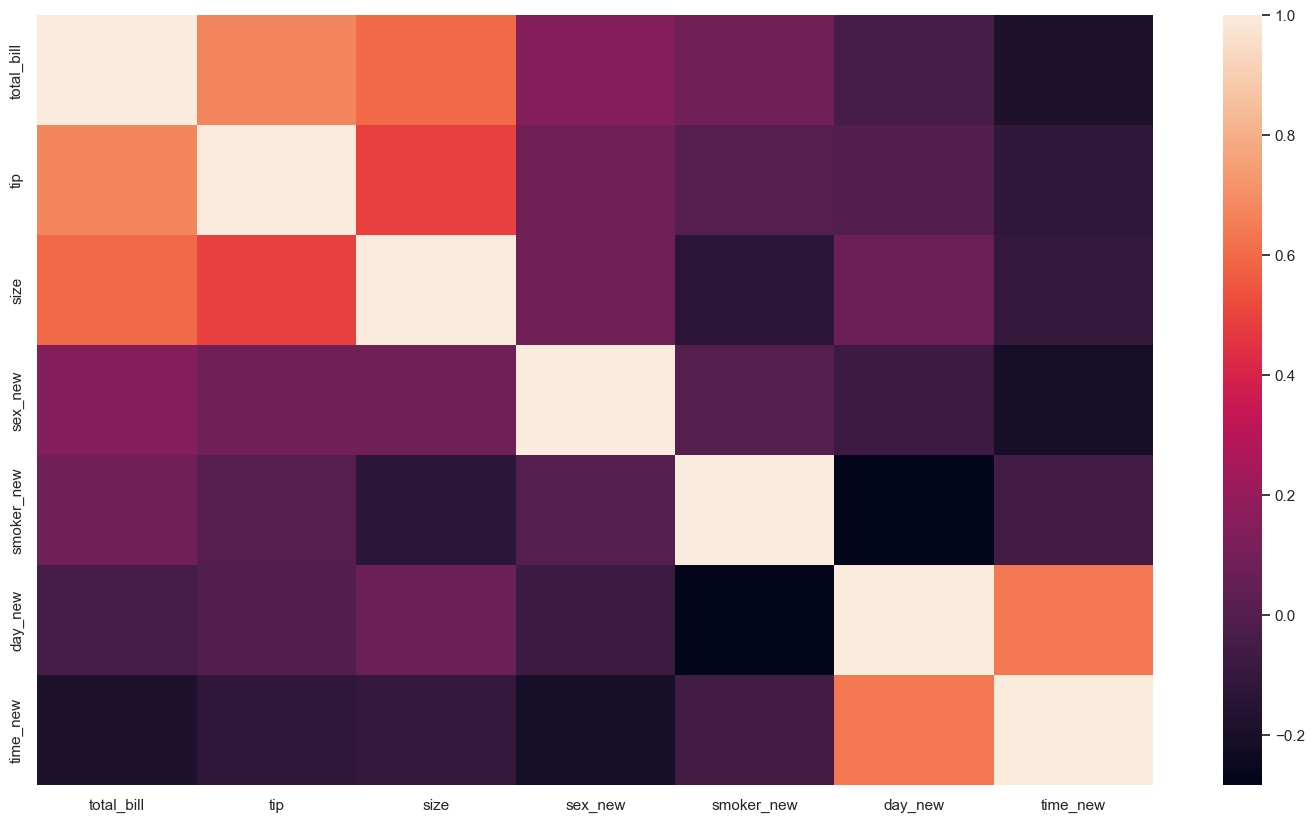

In [554]:
sns.heatmap(corr)

In [555]:
n2_df=new_df.drop(['sex_new','smoker_new','day_new'],axis=1)

In [556]:
n2_df

,total_bill,tip,size,time_new
0,16.99,1.01,2,0
1,10.34,1.66,3,0
2,21.01,3.50,3,0
3,23.68,3.31,2,0
4,24.59,3.61,4,0
...,...,...,...,...
239,29.03,5.92,3,0
240,27.18,2.00,2,0
241,22.67,2.00,2,0
242,17.82,1.75,2,0


In [557]:
x=n2_df.drop(['tip'],axis=1)

In [558]:
y=n2_df['tip']

In [559]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [560]:
re_train=re.fit(x_train,y_train)

In [561]:
pred=re_train.predict(x_test)

In [562]:
pred,y_test

(array([2.83235831, 1.81004265, 3.88393934, 4.00791246, 2.31301884,
        2.65380001, 3.74148524, 2.26490987, 2.36607135, 2.4215817 ,
        2.69080691, 1.99507716, 2.09560329, 2.33831617, 1.73495607,
        3.14180336, 3.14827957, 2.99518868, 2.52057516, 5.84204186,
        3.52682274, 3.21613484, 2.32258824, 1.88220611, 3.23926415,
        2.19182123, 1.94881853, 3.33750252, 3.13825027, 6.6831713 ,
        4.82778541, 1.71474988, 3.26037305, 2.87584142, 2.87567134,
        3.95208443, 2.1116489 , 5.71268778, 2.3278216 , 3.09603248,
        1.97102267, 2.45364506, 3.21445457, 2.26135678, 2.06692294,
        0.97570709, 1.97842405, 3.03480102, 1.80972497, 2.22729547,
        3.24406009, 3.52253703, 4.54636288, 2.58872025, 2.80182762,
        2.31579436, 1.66941642, 2.6473238 , 2.90250135, 2.75724926,
        4.681268  , 2.60014   , 3.15709387, 2.61555026, 2.87029038,
        2.93412729, 2.38735032, 1.36242922, 3.76568733, 3.57417661,
        3.44170687, 4.52398866, 2.70991786, 2.81

In [563]:
r2_score(y_test,pred)*100

35.06752486290782

In [564]:
mean_squared_error(y_test, pred)*100

85.59328675301073

# Again try after removing the skewness

In [565]:
n2_df.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
time_new      0.993335
dtype: float64

In [566]:
tb=n2_df['total_bill']

In [567]:
tb

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [568]:
tb_log=np.log1p(tb)

In [569]:
tb_log

0      2.889816
1      2.428336
2      3.091497
3      3.205993
4      3.242202
         ...   
239    3.402197
240    3.338613
241    3.164208
242    2.934920
243    2.984671
Name: total_bill, Length: 244, dtype: float64

In [570]:
tb_log.skew()

-0.010800869997070795

In [643]:
tb_sqa=tb**2

In [644]:
tb_sqa

0      288.6601
1      106.9156
2      441.4201
3      560.7424
4      604.6681
         ...   
239    842.7409
240    738.7524
241    513.9289
242    317.5524
243    352.6884
Name: total_bill, Length: 244, dtype: float64

In [645]:
tb_sqa.skew()

2.1870296642675506

In [640]:
tb_sqr=tb**(1/2)

In [641]:
tb_sqr

0      4.121893
1      3.215587
2      4.583667
3      4.866210
4      4.958831
         ...   
239    5.387950
240    5.213444
241    4.761302
242    4.221374
243    4.333590
Name: total_bill, Length: 244, dtype: float64

In [642]:
tb_sqr.skew()

0.5661281592596766

In [577]:
tp=n2_df['tip']

In [578]:
tp

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [579]:
tp_log=np.log1p(tp)

In [580]:
tp_log

0      0.698135
1      0.978326
2      1.504077
3      1.460938
4      1.528228
         ...   
239    1.934416
240    1.098612
241    1.098612
242    1.011601
243    1.386294
Name: tip, Length: 244, dtype: float64

In [581]:
tp_log.skew()

0.38049444627351625

In [637]:
tp_sqa=tp**2

In [638]:
tp_sqa

0       1.0201
1       2.7556
2      12.2500
3      10.9561
4      13.0321
        ...   
239    35.0464
240     4.0000
241     4.0000
242     3.0625
243     9.0000
Name: tip, Length: 244, dtype: float64

In [639]:
tp_sqa.skew()

3.6113786370026335

In [634]:
tp_sqr=tp**(1/2)

In [635]:
tp_sqr

0      1.004988
1      1.288410
2      1.870829
3      1.819341
4      1.900000
         ...   
239    2.433105
240    1.414214
241    1.414214
242    1.322876
243    1.732051
Name: tip, Length: 244, dtype: float64

In [636]:
tp_sqr.skew()

0.705367651802773

In [588]:
s=n2_df['size']

In [589]:
s

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [590]:
s_log=np.log1p(s)

In [591]:
s_log

0      1.098612
1      1.386294
2      1.386294
3      1.098612
4      1.609438
         ...   
239    1.386294
240    1.098612
241    1.098612
242    1.098612
243    1.098612
Name: size, Length: 244, dtype: float64

In [592]:
s_log.skew()

0.943404713840478

In [631]:
s_sqa=s**2

In [632]:
s_sqa

0       4
1       9
2       9
3       4
4      16
       ..
239     9
240     4
241     4
242     4
243     4
Name: size, Length: 244, dtype: int64

In [633]:
s_sqa.skew()

2.238128646188106

In [628]:
s_sqr=s**(1/2)

In [629]:
s_sqr

0      1.414214
1      1.732051
2      1.732051
3      1.414214
4      2.000000
         ...   
239    1.732051
240    1.414214
241    1.414214
242    1.414214
243    1.414214
Name: size, Length: 244, dtype: float64

In [630]:
s_sqr.skew()

1.1016323394959462

In [599]:
tn=n2_df['time_new']

In [600]:
tn

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time_new, Length: 244, dtype: int32

In [601]:
tn_log=np.log1p(tn)

In [602]:
tn_log

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    0.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: time_new, Length: 244, dtype: float64

In [603]:
tn_log.skew()

0.9933347968403005

In [626]:
tn_sqa=tn**2

In [627]:
tn_sqa

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    0
241    0
242    0
243    0
Name: time_new, Length: 244, dtype: int32

In [624]:
tn_sqa.skew()

0.9933347968403005

In [625]:
tn_sqr=tn**(1/2)

In [608]:
tn_sqr

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    0.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: time_new, Length: 244, dtype: float64

In [609]:
tn_sqr.skew()

0.9933347968403005

In [610]:
n3_df=pd.concat([tb_log,tp_log,s_log,tn_log],axis=1)

In [611]:
n3_df

,total_bill,tip,size,time_new
0,2.889816,0.698135,1.098612,0.0
1,2.428336,0.978326,1.386294,0.0
2,3.091497,1.504077,1.386294,0.0
3,3.205993,1.460938,1.098612,0.0
4,3.242202,1.528228,1.609438,0.0
...,...,...,...,...
239,3.402197,1.934416,1.386294,0.0
240,3.338613,1.098612,1.098612,0.0
241,3.164208,1.098612,1.098612,0.0
242,2.934920,1.011601,1.098612,0.0


In [612]:
x=n3_df.drop(['tip'],axis=1)

In [613]:
y=n3_df['tip']

In [614]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [615]:
re_train=re.fit(x_train,y_train)

In [616]:
pred=re_train.predict(x_test)

In [617]:
pred,y_test

(array([1.33208696, 0.98089205, 1.56295141, 1.58667879, 1.17861707,
        1.28693122, 1.52363814, 1.16104789, 1.20343078, 1.22075282,
        1.29665764, 1.06733912, 1.09332409, 1.19452117, 0.96180013,
        1.41224521, 1.41389667, 1.36975512, 1.25012525, 1.87498123,
        1.48692578, 1.42673153, 1.18939543, 1.01654518, 1.43206083,
        1.13301495, 1.04718941, 1.44019097, 1.38702475, 1.95629628,
        1.70075794, 0.92917987, 1.42079794, 1.34244897, 1.34025462,
        1.58507495, 1.1145461 , 1.8471564 , 1.18389187, 1.3916382 ,
        1.05697049, 1.22646077, 1.41608425, 1.12615333, 1.0808053 ,
        0.46660526, 1.06018558, 1.3826837 , 0.95026208, 1.15706726,
        1.42199976, 1.47423677, 1.67762323, 1.26819334, 1.32467076,
        1.17961067, 0.90239827, 1.28520794, 1.3476857 , 1.30595477,
        1.69893065, 1.27245572, 1.40440386, 1.27605404, 1.34113897,
        1.35598528, 1.21014752, 0.79457862, 1.53927019, 1.50306863,
        1.46680758, 1.67262027, 1.30269015, 1.32

In [618]:
r2_score(y_test,pred)*100

41.09636245964124

In [619]:
mean_squared_error(y_test, pred)*100

5.11601346021024

In [620]:
n3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   size        244 non-null    float64
 3   time_new    244 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [621]:
#on square root 100%, log 41%, outliers left, scaling left